# 9-1. 프로젝트 : 모든 장르 간 편향성 측정해 보기

In [1]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.5.2
4.1.2
1.0
0.11.2


## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
# 약 15분정도 소요
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있음
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됨
        tokenized.append(res)

In [4]:
print(len(tokenized))

71156


## STEP 2. 추출된 결과로 embedding model 만들기

In [8]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
#model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
#model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 


model = Word2Vec(sentences = tokenized, vector_size = 100, window = 5, min_count = 3, workers = 4, sg = 0)
print("모델 학습 완료!")

model_result = model.wv.most_similar("영화")
print(model_result)

모델 학습 완료!
[('작품', 0.8720501065254211), ('다큐멘터리', 0.8524906635284424), ('드라마', 0.8191491961479187), ('형식', 0.793990433216095), ('코미디', 0.7861042618751526), ('감동', 0.7855206727981567), ('주제', 0.7809012532234192), ('영화로', 0.776618480682373), ('실화', 0.757230818271637), ('스토리', 0.7565092444419861)]


In [13]:
model_result = model.wv.most_similar('고백')
print(model_result)

[('진심', 0.8754377365112305), ('이별', 0.863400399684906), ('키스', 0.8592734932899475), ('실연', 0.8538469672203064), ('그동안', 0.8486776947975159), ('욕정', 0.8410037755966187), ('잠자리', 0.8378224968910217), ('위로', 0.8359266519546509), ('첫사랑', 0.8310431241989136), ('거식증', 0.8276492357254028)]


In [14]:
model_result = model.wv.most_similar('사랑')
print(model_result)

[('진심', 0.7166072726249695), ('첫사랑', 0.7034298777580261), ('행복', 0.6997624039649963), ('애정', 0.6938369870185852), ('만남', 0.6879363059997559), ('가슴', 0.6857500076293945), ('정일', 0.6849392652511597), ('이별', 0.6827889084815979), ('연애', 0.6812314987182617), ('숙맥', 0.6807584762573242)]


In [16]:
model_result = model.wv.most_similar('연인')
print(model_result)

[('재회', 0.8296455144882202), ('애인', 0.8195734620094299), ('여자친구', 0.802338182926178), ('첫사랑', 0.7967410683631897), ('남자친구', 0.7824347019195557), ('리사', 0.766962468624115), ('이자나미', 0.7659875750541687), ('처제', 0.7601512670516968), ('절친', 0.7442957758903503), ('레오', 0.7433140873908997)]


In [17]:
model_result = model.wv.most_similar('이별')
print(model_result)

[('실연', 0.8920677304267883), ('첫사랑', 0.868462324142456), ('고백', 0.8634002208709717), ('수연', 0.8541041612625122), ('격정', 0.8505744338035583), ('재회', 0.8447310924530029), ('현우', 0.8444361090660095), ('키스', 0.8423898220062256), ('토마슈', 0.8362120985984802), ('거식증', 0.8317640423774719)]


## STEP 3. target, attribute 단어 셋 만들기

* target은 예술영화, 일반영화
* attribute는 영화의 모든 21개의 장르 'SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬'
, '미스터리', '범죄', '사극', '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지

In [18]:
# target
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [19]:
# 2개의 파일을 처리하는데 10분 가량 걸림.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

(2, 41082)
23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 spart matrix를 가져옴
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 spart matrix를 가져옴 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬 

print('예술영화(art)를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화(gen)를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화(art)를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화(gen)를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [22]:
# 상위 100개의 단어들 중 중복되는 단어를 제이하고 상위 n개 단어를 추출
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [23]:
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


* attribute 별 대표 단어 추출하자.
* 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 언어를 선택하는 데에 더 유리 할 것이다.* 
모든 21개의 장르에 대해서 고려해보자.

In [24]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [25]:
# 약 10분정도 걸림
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [27]:

m = [X[i].tocoo() for i in range(X.shape[0])] # 장르를 TF-IDF로 표현한 spart matrix를 가져옴

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True) # 장르를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬

attributes = []

# 위 100개의 단어들 중 중복되는 단어를 제이하고 상위 n개 단어를 추출
n_words = []
for i in range(len(w)):
    temp = []
    for j in range(100):
        temp.append(vectorizer.get_feature_names()[w[i][j][0]])
    n_words.append(temp)
    
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인

## STEP 4. WEAT score 계산과 시각화

In [28]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

* s(w, A, B)가 의미하는 것은 target에 있는 단어 w가 두 attribute 셋 A, B에 속한 단어들과의 유사도의 평균(mean)값이 얼마나 차이 나는지를 측정한다.

* 즉, s(w, A, B)는 개별 단어 w가 개념축 A-B에 대해 가지는 편향성을 계산한 값이 된다.

* 이 편향성 값은 -2에서 2사이의 값을 가지게 되며, 그 절댓값이 클수록 w는 A-B 개념축에 대해 편향성을 가진다는 뜻이 된다.

* WEAT score는 X에 속하는 단어들과 Y에 속하는 단어들이 A-B 개념축에 대해 가지는 편향성의 정도가 뚜렷이 차이 날수록 이 WEAT score 식의 분자값의 절댓값은 커지게 된다.

* 이 값을 X, Y에 속하는 모든 단어들이 가지는 편향성 값의 표준편차(std)로 normalize한 값이 최종 WEAT score가 된다.

In [29]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [30]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [31]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 멜로로맨스 -1.3448867
공포(호러) 다큐멘터리 1.1383752
기타 멜로로맨스 -1.1865813
다큐멘터리 멜로로맨스 -1.4910873
다큐멘터리 미스터리 -1.2834679
다큐멘터리 성인물(에로) -1.2556432
다큐멘터리 스릴러 -1.1600777
멜로로맨스 범죄 1.2315611
멜로로맨스 서부극(웨스턴) 1.1482745
멜로로맨스 애니메이션 1.1767149
멜로로맨스 전쟁 1.4346324


여기서 X는 예술영화이고, Y는 일반영화이다.

A와 B는 영화 장르인 attribute이다.

결과는 다음과 같이 해석한다.

WEAT 점수가 양수로 나오면 X가 A에 가깝고 Y가 B에 가까운 것이다.

WEAT 점수가 음수로 나오면 X가 B에 가깝고 Y가 A에 가까운 것이다.

그래서 결과는 다음과 같다.

예술영화와 일반영화, 그리고 SF와 멜로로맨스의 WEAT score의 의미를 해석해보면  
 --> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 SF에 가깝다고 볼 수 있다.  
 
예술영화와 일반영화, 그리고 공포(호러)와 다큐멘터리의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 공포(호러)와 가깝고, 일반 영화가 다큐멘터리에 가깝다고 볼 수 있다.

예술영화와 일반영화, 그리고 기타와 멜로로맨스의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 기타에 가깝다고 볼 수 있다.

예술영화와 일반영화, 그리고 다큐멘터리와 멜로로맨스의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 다큐멘터리에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 다큐멘터리와 미스터리의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 미스터리와 가깝고, 일반 영화가 다큐멘터리에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 다큐멘터리와 성인물(에로)의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 성인물(에로)와 가깝고, 일반 영화가 다큐멘터리에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 다큐멘터리와 스릴러의 WEAT score의 의미를 해석해보면   
--> 예술 영화는 스릴러와 가깝고, 일반 영화가 다큐멘터리에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 멜로로맨스와 범죄의 WEAT score의 의미를 해석해보면   
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 범죄에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 멜로로맨스와 서부극(웨스턴)의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 서부극(웨스턴)에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 멜로로맨스와 애니메이션의 WEAT score의 의미를 해석해보면  
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 애니메이션에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면   
--> 예술 영화는 멜로로맨스와 가깝고, 일반 영화가 전쟁에 가깝다고 볼 수 있다.  

예술영화와 일반영화, 그리고 미스터리와 전쟁의 WEAT score의 의미를 해석해보면   
--> 예술 영화는 미스터리와 가깝고, 일반 영화가 전쟁에 가깝다고 볼 수 있다.  


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/bac

<AxesSubplot:>

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


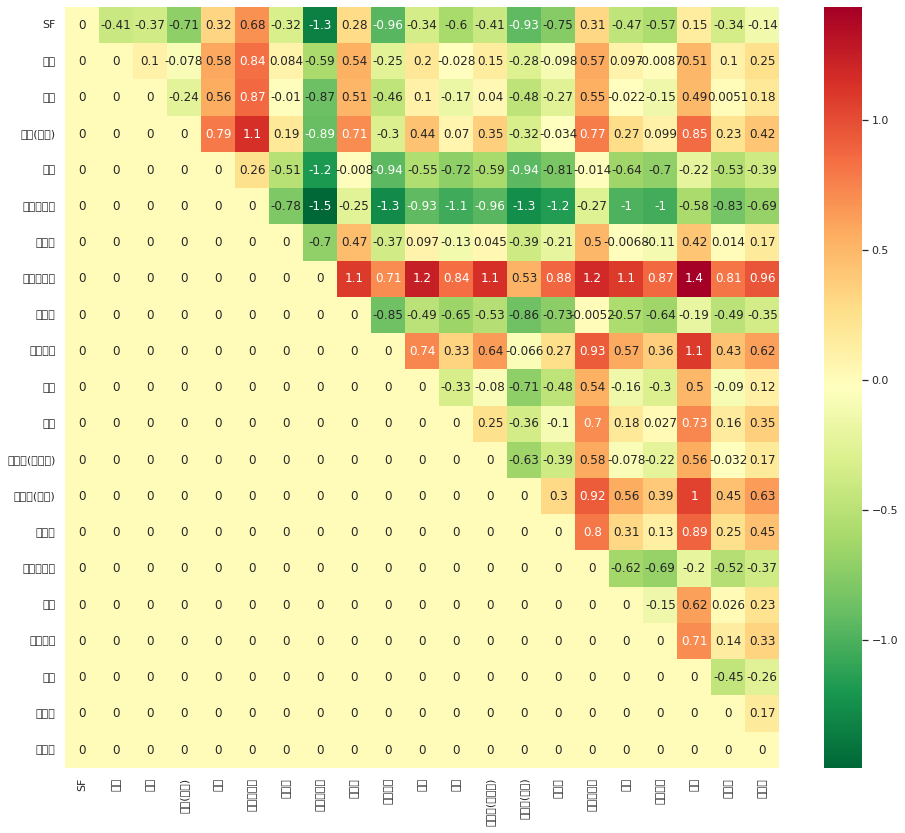

In [32]:
import numpy as np; 
import matplotlib.pyplot as plt
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")
plt.figure(figsize=(16,14)) 
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

회고
    - 배운 점 : 데이터의 편향성에 대해 인사이트가 생겼다  
    - 아쉬운 점: 공부를 더해봐야 하는데 못햇다.  
    - 느낀 점 : 재미있고 흥미 진진한 분야 인것 같다  
    - 어려웠던 점 : 시간이 촉박함.   
